## Logistic Regression Project

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

### Importing Dataset

In [3]:
titanic = pd.read_csv('titanic_train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## 1. Exploratory Data Analysis (EDA)

### Count Survival Rate

<AxesSubplot:xlabel='Survived', ylabel='count'>

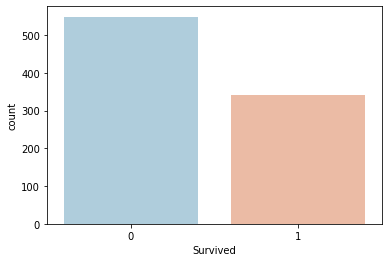

In [20]:
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

#### **It is apparently survival rate is relative low due the death count is more than survived

### Separate Countplot with Gender Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

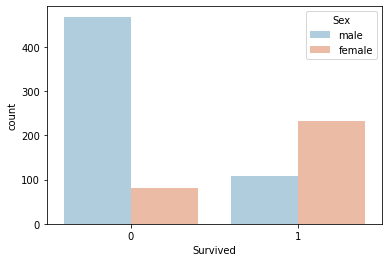

In [21]:
sns.countplot(x='Survived',data=titanic,hue='Sex',palette='RdBu_r')

#### **Female Passenger tend to survive than male

### Separate Countplot with Pclass (Passenger Class)

<AxesSubplot:xlabel='Survived', ylabel='count'>

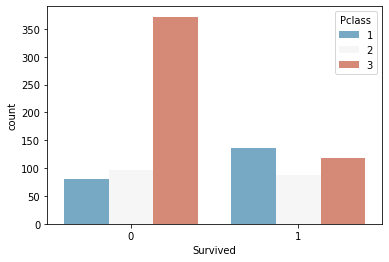

In [22]:
sns.countplot(x='Survived',data=titanic,hue='Pclass',palette='RdBu_r')

#### **Passenger with Higher Class (1st Class) tend to more survive compare to these two class lower than (2nd and 3rd) that may cheaper.

## Plot Age and Visualize the distribution

<AxesSubplot:ylabel='Frequency'>

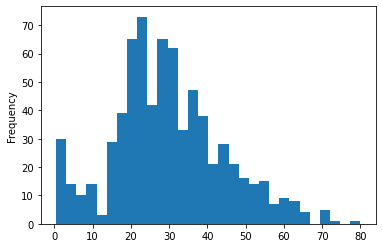

In [26]:
titanic['Age'].plot.hist(bins=30)

#### **It is appear that we almost had modal distribution with possitive skewness on age column that is mean that young passenger is around 0-10, and average passenger is around 20-35

## Passenger information

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Plot Relative of Onboard Passenger

<AxesSubplot:xlabel='SibSp', ylabel='count'>

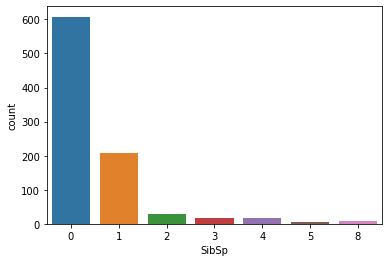

In [29]:
sns.countplot(x='SibSp',data=titanic)

#### **it is to be appear that passenger on board does not have relative / childern or spouse

### Plot Fare of the Passenger

<AxesSubplot:>

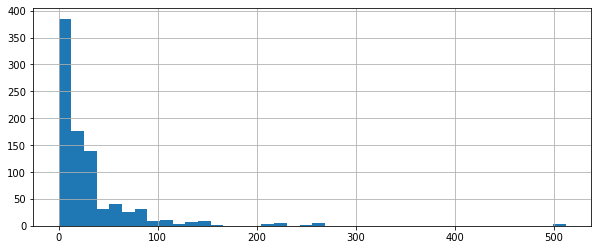

In [33]:
titanic['Fare'].hist(bins=40,figsize=(10,4))

#### **Passenger mostly from 3rd Class that is make sense that mostly passenger is paid for cheaper fare

## 2. Dealing with Missing Data

### Create Heatmap of Empty / NaN Value, check whether NaN count more than 20% or less and do imputation to replace NaN Values

<AxesSubplot:>

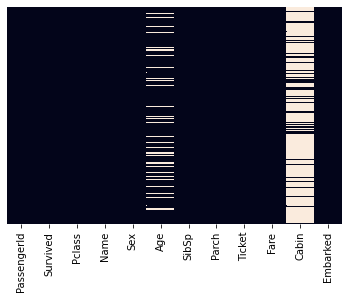

In [35]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False) #remove colorbar and y axis value

## Dealing with missing Age Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

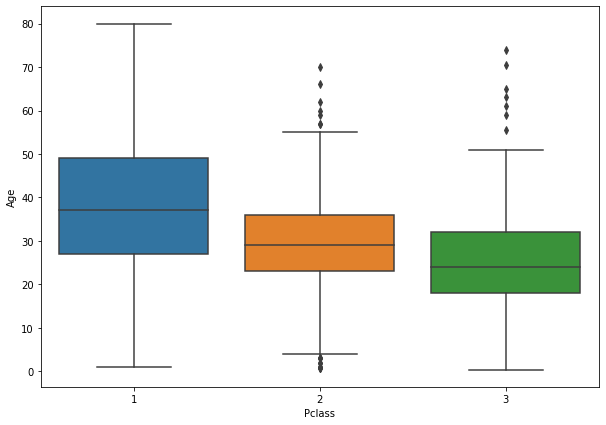

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

### **Based on passenger class we know the information such median of Age based on Pclass

In [39]:
def impute(cols):
    age = cols[0]
    pclass = cols[1]
    
    if(pd.isnull(age)):
        if(pclass == 1):
            return 37
        elif(pclass == 2):
            return 32
        elif(pclass == 3):
            return 30
    else:
        return age

In [41]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute,axis=1)

#### **Check again theheatmap

<AxesSubplot:>

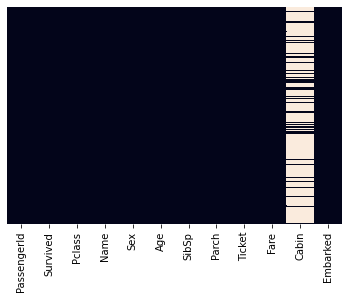

In [42]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False)

#### **Drop Cabin column since too much NaN Value

In [43]:
titanic.drop('Cabin',inplace=True,axis=1)

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

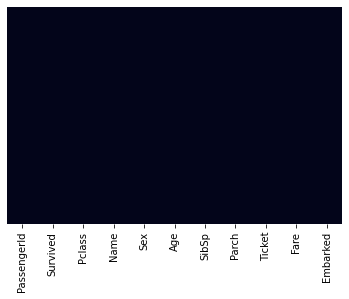

In [46]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels=False)

In [49]:
titanic.dropna(inplace=True)

## Create dummy value to String Data

In [53]:
dfsex_dummy = pd.get_dummies(titanic['Sex'],drop_first=True)

In [56]:
dfsex_dummy.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
dfembark_dummy = pd.get_dummies(titanic['Embarked'],drop_first=True)

### **Concat the created dummy into main column

In [63]:
titanic = pd.concat([titanic,dfsex_dummy,dfembark_dummy],axis=1)

In [64]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### **Remove unecessary column because we already had dummy data

In [ ]:
titanic.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [69]:
titanic.drop('PassengerId',inplace=True,axis=1)

In [70]:
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Create model Data

In [74]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       174
           1       0.86      0.69      0.76       120

    accuracy                           0.83       294
   macro avg       0.83      0.81      0.81       294
weighted avg       0.83      0.83      0.82       294



In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test,predictions)

array([[160,  14],
       [ 37,  83]])

## ** From trained data we got 160 (TP) and 83 (TN) and got 37 (FP) error type 1, and 14 (FN) error type 2